In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime as dt
from sklearn.decomposition import PCA
from sklearn import datasets, svm, metrics
from sklearn.datasets import fetch_openml

import pandas as pd
import cv2
import glob
import os
os.environ['DISPLAY'] = ':0'

images = glob.glob('dataset/*.jpg')
assert images

# Read Images
ImageDataset =[]
for fname in sorted(images):
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(256,256))
    # img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    h,w,d = img.shape
    # we need to flatten the image. we want a matrix like (n_imgaes, n_features)
    ImageDataset.append(img.reshape(h*w*d))

ImageDataset = np.asarray(ImageDataset)

# # # Save the dataset
np.savez("ImageDataset", ImageDataset)
# # # Load the dataset
data = np.load("ImageDataset.npz")
ImageDataset = data['arr_0']

# PCA is affected by scale so you need to scale the features in the data before applying PCA
from sklearn.preprocessing import StandardScaler
ImageDataset_Scaled = StandardScaler().fit_transform(ImageDataset)
# split data 
from sklearn.model_selection import train_test_split

# Import label
lable = np.loadtxt('./lable.txt', dtype = 'str')
y = lable

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(ImageDataset_Scaled, y, test_size=0.2)

pca = PCA(0.95)  # It means that scikit-learn choose the minimum number of principal components 

principalComponents = pca.fit_transform(ImageDataset_Scaled)

print(pca.explained_variance_ratio_)
print(len(pca.explained_variance_ratio_))
print(sum(pca.explained_variance_ratio_))

## Apply Logistic Regression to the Transformed Data
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter = 10000)
logisticRegr.fit(X_train, y_train)


[0.25436371 0.12997615 0.09109285 0.06589954 0.04732425 0.04376829
 0.03240949 0.02418786 0.02257373 0.02128054 0.01892743 0.01690922
 0.01594159 0.01431612 0.01236936 0.01094505 0.00980107 0.0094312
 0.00881996 0.00788795 0.00745029 0.00713468 0.00692652 0.00653132
 0.00607202 0.00601824 0.00550076 0.00527615 0.00518284 0.00504838
 0.00448878 0.0042714  0.00413397 0.00398502 0.00379752 0.00368279
 0.00341995 0.00323277]
38
0.9503787605920295


LogisticRegression(max_iter=10000)

In [35]:
def show_some_digits(images, targets, sample_size=24, title_text='{}' ):
    '''
    Visualize random digits in a grid plot
    images - array of flatten gidigs [:,784]
    targets - final labels
    '''
    nsamples=sample_size
    rand_idx = np.random.choice(images.shape[0], nsamples)
    print(rand_idx)
    images_and_labels = list(zip(images[rand_idx], targets[rand_idx]))


    img = plt.figure(1, figsize=(15, 12), dpi=160)
    for index, (image, label) in enumerate(images_and_labels):
        plt.subplot(np.ceil(nsamples/5.0), 5, index + 1)
        plt.axis('off')
        #each image is flat, we have to reshape to 2D array 28x28-784
        plt.imshow(image.reshape(256,256,3), cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(title_text.format(label))
    plt.show()

In [46]:
def show_picture(images, targets, sample_size=24, title_text='{}' ):
    '''
    Visualize random digits in a grid plot
    images - array of flatten gidigs [:,784]
    targets - final labels
    '''
    for i in range(sample_size):
        images_and_labels = list(zip(images[i], targets[i]))
    
    print(len(images_and_labels))

    img = plt.figure(1, figsize=(15, 12), dpi=160)
    for index, (image, label) in enumerate(images_and_labels):
        plt.subplot(np.ceil(sample_size/5.0), 5, index + 1)
        plt.axis('off')
        print(image.shape)
        #each image is flat, we have to reshape to 2D array (256,256,3)
        plt.imshow(image.reshape(256,256,3), cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(title_text.format(label))
    plt.show()

In [48]:
# Predict for some Observation (image)
print(logisticRegr.predict(X_test))
# show_some_digits(X_test, logisticRegr.predict(X_test), 14)
# show_picture(X_test, logisticRegr.predict(X_test), 13)

['mug' 'mug' 'mug' 'mug' 'book' 'book' 'book' 'mug' 'book' 'mug' 'mug'
 'mug' 'book']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


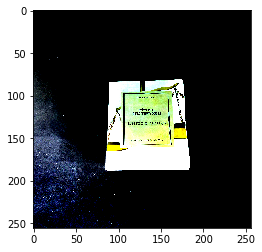

In [64]:
plt.imshow(X_test[12].reshape(256,256,3), cmap=plt.cm.gray_r, interpolation='nearest')